In [3]:
import random
import math
import numpy as np
import helper_functions

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Generacja 1:


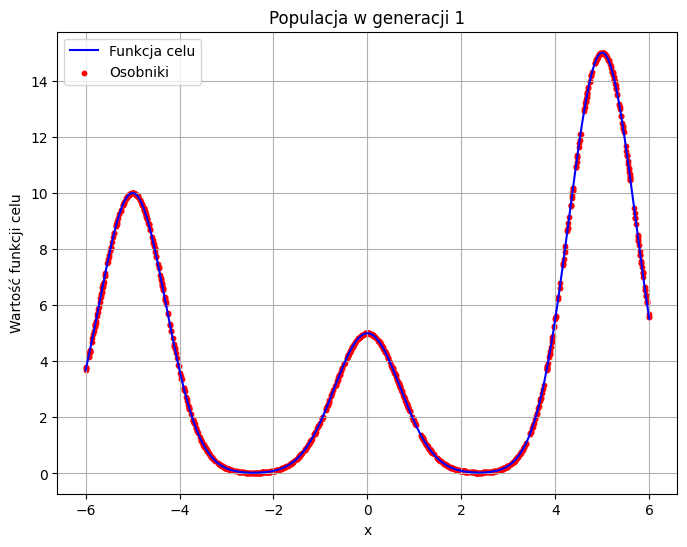

d:\_Ważne\project\Niching methods\helper_functions.py:301: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


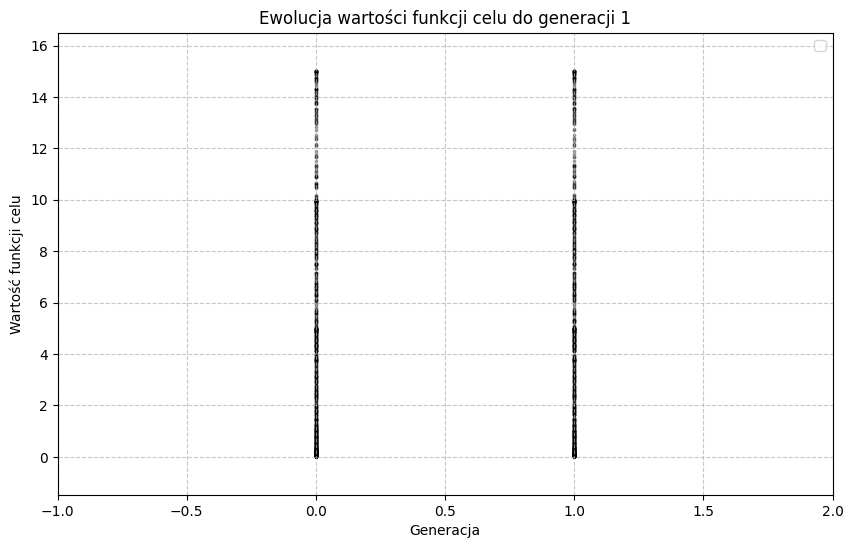

Generacja 25:


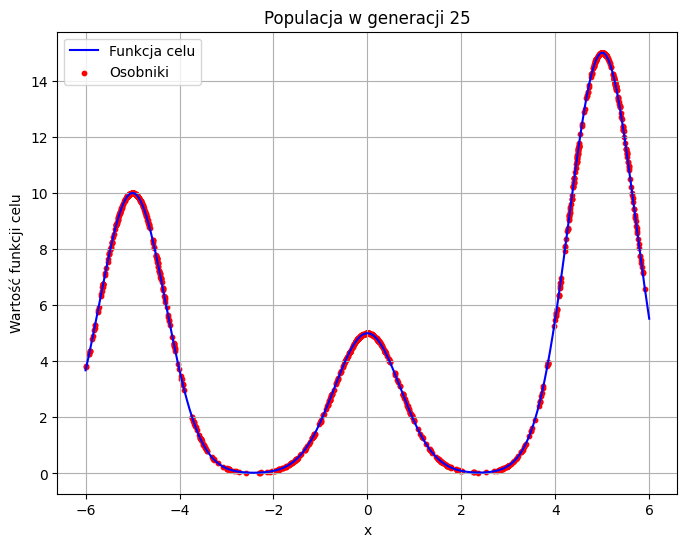

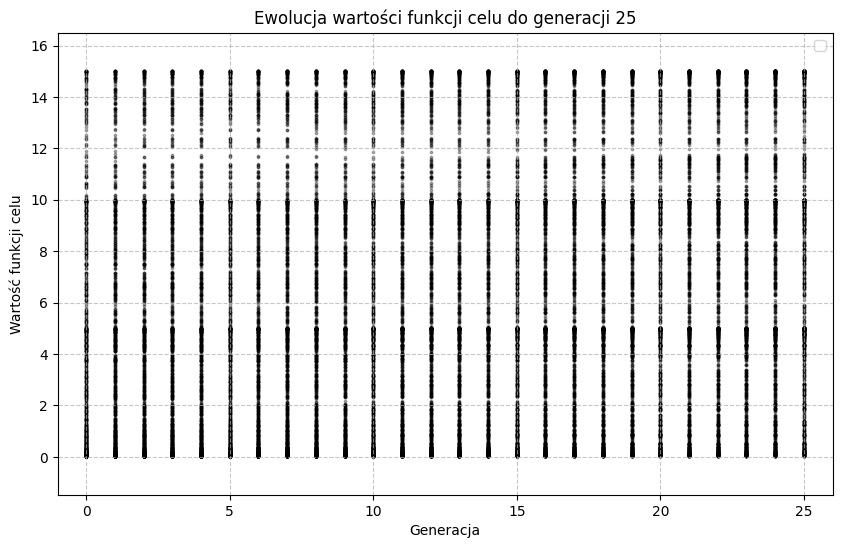

Generacja 50:


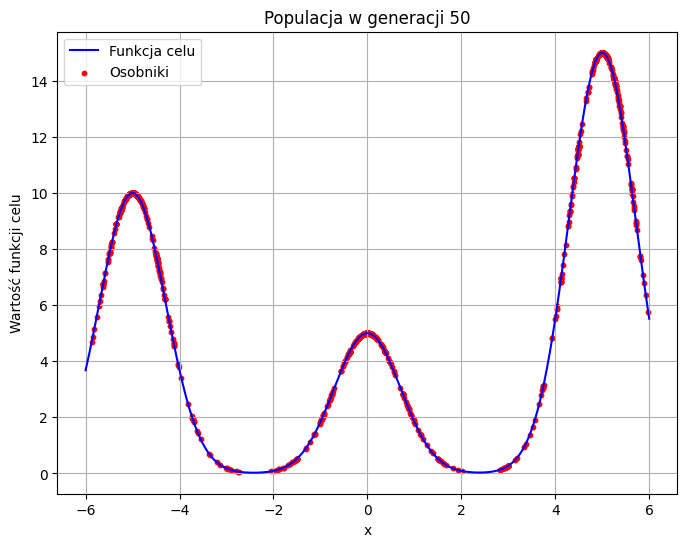

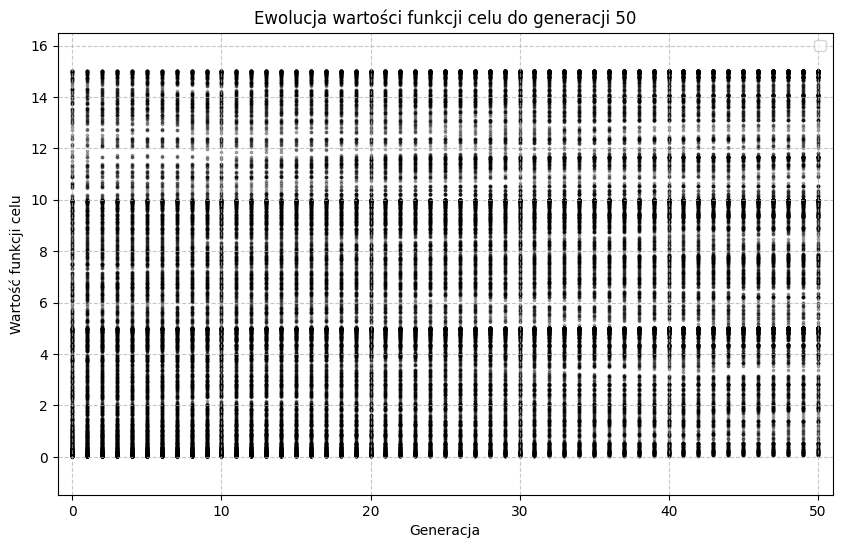

Generacja 75:


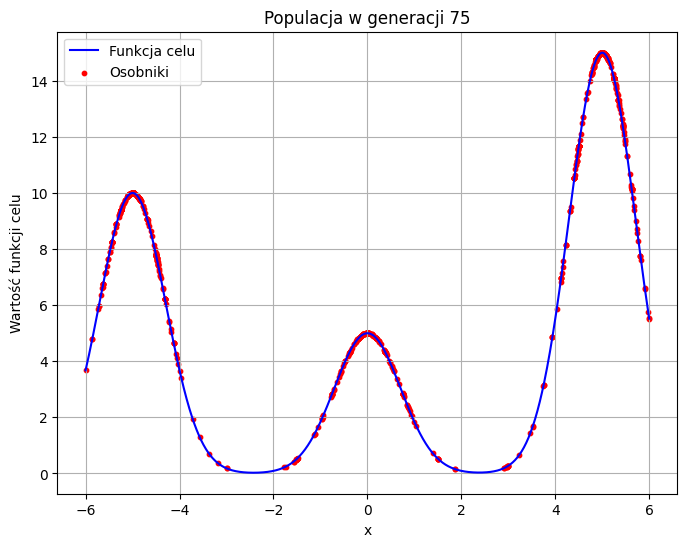

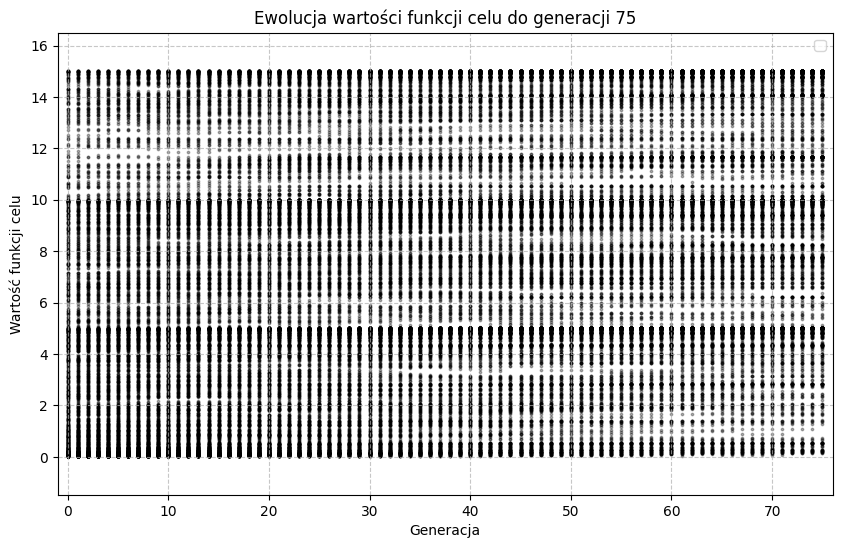

Generacja 100:


KeyboardInterrupt: 

In [6]:
def custom_fitness_function(x):    
    return 10 * math.exp(-1 * (x + 5)**2) + 5 * math.exp(-1 * (x - 0)**2) + 15 * math.exp(-1 * (x - 5)**2)


# Configuration class to store shared parameters
helper_functions.set_config(
    decode_range_min=-6, # Minimum decoding range value for x
    decode_range_max=6, # Maximum decoding range value for x
    genotype_length=30, # Genotype length (number of bits)
    mutation_bit_probability=0.9, # Probability of mutating a single bit
    population_size=1000, # Population size
    CXPB=0.8, # Crossover probability
    MUTPB=0.01, # Mutation probability
    NGEN=200, # Number of generations
    threshold=0.1, # Threshold for grouping extrema
    min_cluster_size=100, # Minimum cluster size
    custom_fitness_function=custom_fitness_function, # Objective function
    optimization_type="max", #max or min
    niching_method="crowding", #"crowding", "sharing", "clearing", "speciation"
    sigma_share=0.2, # For Fitness Sharing
    sigma_clear=2, # For Clearing
    capacity=8, # For Clearing
    sigma_species=0.1 # For Speciation
)



toolbox = helper_functions.configure_deap()
config = helper_functions.get_config()


def main():
    random.seed(1)
    pop = toolbox.population()
    pop_history = []
    
    # Plot generations
    plot_generations = np.linspace(1, config['NGEN'], 9, dtype=int).tolist()
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    pop_history.append(list(map(toolbox.clone, pop)))
    
    # Evolve the population
    pop = helper_functions.evolve_population(pop, toolbox, pop_history, plot_generations)
    
    # Show the average estimates and best individuals
    num_extrema, extrema_values, clusters = helper_functions.find_ekstremum(pop)
    print(f"\n Amount of extrema found: {num_extrema}")
    print("Extrema (average estimate and best individual):")
    for i, (cluster, (avg_x, avg_fitness)) in enumerate(zip(clusters, extrema_values)):
        print(f"Extrema {i+1}:")
        print(f"  Average estimate: x = {avg_x:.3f}, fitness = {avg_fitness:.3f}")
        
        if config['optimization_type'] == "max":
            best_ind = max(cluster, key=lambda ind: ind[1])
        else:
            best_ind = min(cluster, key=lambda ind: ind[1])
        ind = best_ind[2]
        x = best_ind[0]
        fitness = best_ind[1]
        print(f"  Best: Individual (genotype): {ind}, x (phenotype): {x:.3f}, Fitness: {fitness:.3f}")
    
    return pop

if __name__ == "__main__":
    pop = main()



